In [10]:
import pandas as pd
import geopandas as gpd
import json
import fiona
from shapely.geometry import shape 
from geopandas import GeoDataFrame
import shapely
import shapely.wkt
from shapely.geometry import Point
from shapely.geometry import Polygon
import math

In [17]:

paradas= pd.read_csv("./datos/paradas-de-colectivo.csv", encoding='latin1',delimiter=';')
paradas.head(5)

,X,Y,STOP_ID,TIPO,CALLE,NUMERO,ENTRE1,ENTRE2,LINEAS,DIR_NORM,CALLE_NORM,ALTURA_NOR,COORDX,COORDY,METROBUS,STOP_NAME,STOP_DESC,FUENTE,VERIFICADA,FECHA_ULTI
0,"-58,4327908137487","-34,5923809470",1000086,PARADAS CON REFUGIO,CORDOBA AV.,4859,ARMENIA,GURRUCHAGA,"{151,168}",CORDOBA AV. 4859,CORDOBA AV.,4859.0,102.798.829.931.999.000.000,104.091.825.983.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,9/4/2015
1,"-58,5140298647844","-34,6016371880",1005465,PARADA NO OFICIAL,NUEVA YORK,4224,NaN,GUALEGUAYCHU,{105},NUEVA YORK 4224,NUEVA YORK,4224.0,95.346.600.539.799.900.000,103.064.210.534.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,17/4/2015
2,"-58,4497660921390","-34,5544664433",1002096,PARADAS CON REFUGIO,DEL LIBERTADOR AV.,6250,BLANCO ENCALADA,OLAZABAL,"{15,29}",DEL LIBERTADOR AV. 6250,DEL LIBERTADOR AV.,6250.0,101.242.081.519.000.000.000,108.298.117.206.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,10/4/2015
3,"-58,4941044948861","-34,5623407465",1006607,PARADAS CON REFUGIO,"LARRALDE, CRISOLOGO AV.",5187,NaN,NaN,"{110,71}","LARRALDE, CRISOLOGO AV. 5187","LARRALDE, CRISOLOGO AV.",5187.0,97.172.965.995.399.900.000,107.424.229.065.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,14/4/2015
4,"-58,4844741311517","-34,5757583663",1004767,PARADAS DE POSTE,OLAZABAL AV.,4920,NaN,TRIUNVIRATO AV.,{90},OLAZABAL AV. 4920,OLAZABAL AV.,4920.0,98.057.080.321.899.900.000,105.936.009.144.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,14/4/2015


In [19]:
recorridos= pd.read_csv("./datos/recorrido-colectivos.csv", encoding='latin1',delimiter=';')
recorridos.head(5)

,WKT,ID,LINEA,TIPO_SERVICIO,RAMAL,SENTIDO
0,LINESTRING (-58.6241836989073 -34.562823500814...,8438,175,COMUN BASICO,RAMAL A,VUELTA
1,LINESTRING (-58.4625359653171 -34.555477023218...,8439,175,COMUN BASICO,RAMAL A,IDA
2,LINESTRING (-58.4643450035316 -34.556404964623...,8440,169,COMUN BASICO,RAMAL A,IDA
3,LINESTRING (-58.4643450035316 -34.556404964623...,8441,169,COMUN BASICO,RAMAL B,IDA
4,LINESTRING (-58.6256346989071 -34.563149000814...,8442,169,COMUN BASICO,RAMAL A,VUELTA


In [27]:

gdf = gpd.read_file('./datos/paradas-de-colectivo-zip/paradas_de_colectivo.shp', encoding="latin-1")


DriverError: './datos/paradas-de-colectivo-zip/paradas_de_colectivo.shp' not recognized as a supported file format.

In [26]:
#Check Geometry
def isvalid(geom):
    try:
        shape(geom)
        return 1
    except:
        return 0
    
#Read data

def read_data(path):
    collection = list(fiona.open(path,'r'))
    df1 = pd.DataFrame(collection)
    df1['isvalid'] = df1['geometry'].apply(lambda x: isvalid(x))
    df1 = df1[df1['isvalid'] == 1]
    collection = json.loads(df1.to_json(orient='records'))

    #Convert to geodataframe
    gdf = gpd.GeoDataFrame.from_features(collection)
    return gdf

lineas_shp = read_data('./datos/recorrido-colectivos-zip/LineasNac_polyline.shp')
lineas_shp.head(3)

,Cuit,Entidad_S,Grupo_tari,Jurisdicci,L_R_S,Linea,Linea_S,Modalidad,Ramal_S,Razon_soci,Recorrido,Sentido,geometry
0,30-57196927-7,34,SG1,NACIONAL,001AIDA,001,83,COMUN,151,TRANSPORTES SAN CAYETANO SAC,A,IDA,"LINESTRING Z (-58.441451 -34.620495 0, -58.442..."
1,30-57196927-7,34,SG1,NACIONAL,001AVUELTA,001,83,COMUN,151,TRANSPORTES SAN CAYETANO SAC,A,VUELTA,"LINESTRING Z (-58.617296 -34.647403 0, -58.618..."
2,30-54660863-4,40,SG1,NACIONAL,002AIDA,002,141,COMUN,307,TRANSPORTE VEINTIDOS DE SEPTIEMBRE SAC,A,IDA,"LINESTRING Z (-58.367958 -34.612255 0, -58.367..."


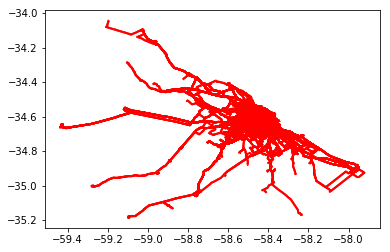

In [53]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd

f, ax = plt.subplots(1)
gpd.plotting.plot_linestring_collection(ax, lineas_shp['geometry'], linewidth=2, color='red')
plt.show()